In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris['data'][:-10, 2:3]
y = (iris['target'][:-10] == 0).astype(int)

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [7]:
y_pred = per_clf.predict(X)

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
f1_score(y_true=y, y_pred=y_pred)

1.0

In [10]:
data = np.array([[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]])

target = np.array([0, 1, 1, 0])

In [11]:
per_clf.fit(data, target)

Perceptron()

In [12]:
per_clf.predict(data)

array([0, 0, 0, 0])

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg = LogisticRegression()
log_reg.fit(data, target)

LogisticRegression()

In [15]:
log_reg.predict(data)

array([0, 0, 0, 0])

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
ran_clf = RandomForestClassifier()
ran_clf.fit(data, target)

RandomForestClassifier()

In [18]:
ran_clf.predict(data)

array([0, 1, 1, 0])

In [19]:
import tensorflow as tf

In [20]:
from tensorflow import keras

In [21]:
tf.__version__

'2.6.0'

In [22]:
keras.__version__

'2.6.0'

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [25]:
X_train_full.shape

(60000, 28, 28)

In [26]:
X_train_full[0].shape

(28, 28)

In [27]:
X_train_full.dtype

dtype('uint8')

In [28]:
import matplotlib.pyplot as plt

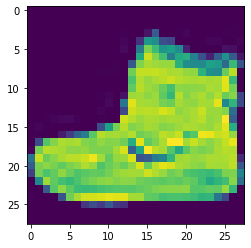

In [29]:
plt.imshow(X_train_full[0])

In [30]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [31]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [32]:
import numpy as np

In [33]:
unique = np.unique(y_train)
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
for i in unique:
    print(np.where(y_train == i))

(array([    1,    10,    28, ..., 54974, 54985, 54998], dtype=int64),)
(array([   11,    24,    33, ..., 54989, 54991, 54996], dtype=int64),)
(array([   18,    27,    43, ..., 54977, 54981, 54993], dtype=int64),)
(array([    8,    14,    17, ..., 54971, 54980, 54997], dtype=int64),)
(array([    0,     6,     7, ..., 54984, 54986, 54990], dtype=int64),)
(array([   30,    31,    34, ..., 54983, 54995, 54999], dtype=int64),)
(array([   13,    15,    41, ..., 54973, 54987, 54988], dtype=int64),)
(array([    2,    20,    23, ..., 54951, 54979, 54992], dtype=int64),)
(array([   12,    19,    29, ..., 54962, 54967, 54994], dtype=int64),)
(array([    3,     4,     5, ..., 54932, 54970, 54978], dtype=int64),)


In [35]:
t = []
for i in unique:
    t.append(np.where(y_train == i)[0][0])
print(t)

[1, 11, 18, 8, 0, 30, 13, 2, 12, 3]


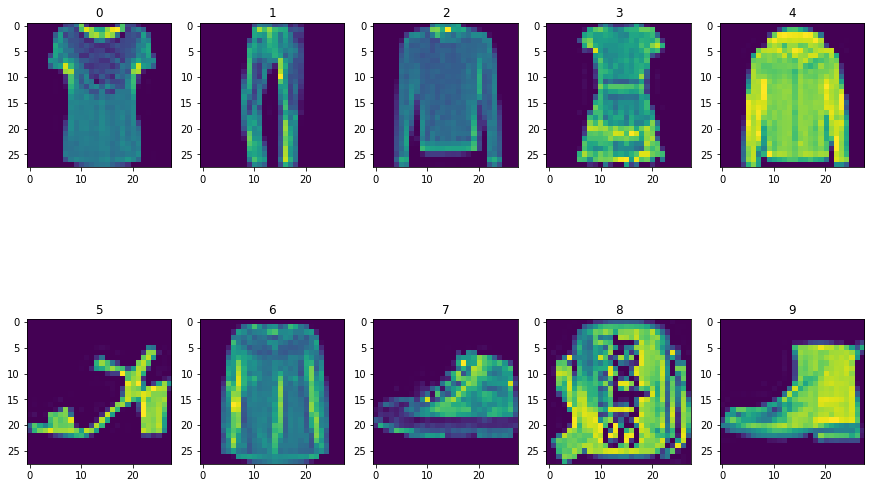

In [36]:
plt.figure(figsize=(15, 10))
for i in range(len(t)):
#     print(t[i])
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[t[i]])
    plt.title(i)
plt.show()

In [37]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

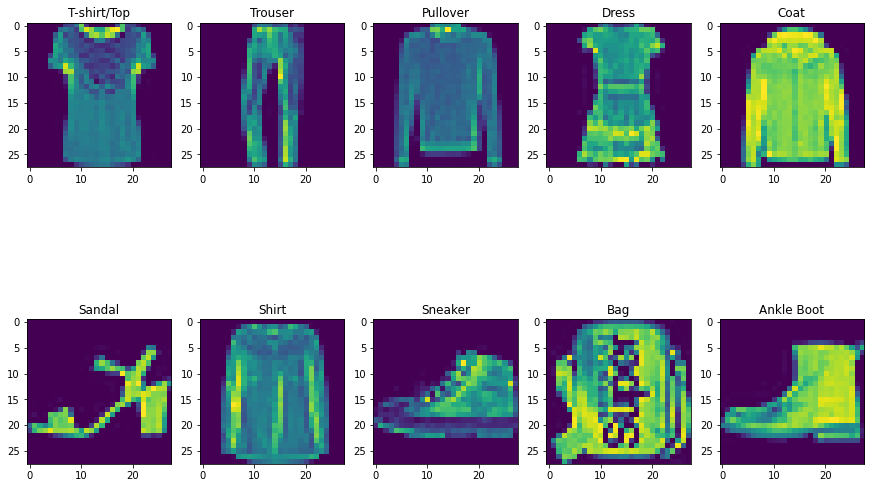

In [38]:
plt.figure(figsize=(15, 10))
for i in range(len(t)):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[t[i]])
    plt.title(class_names[i])
plt.show()

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.layers

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


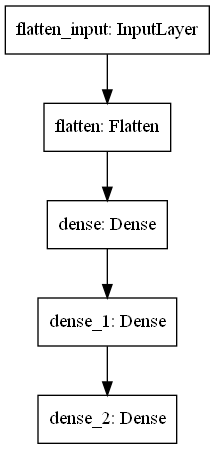

In [42]:
keras.utils.plot_model(model)

In [43]:
weights, biases = model.layers[1].get_weights()

In [44]:
weights.shape

(784, 300)

In [45]:
biases.shape

(300,)

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

1719/1719 [==============================] - 18s 9ms/step - loss: 0.7193 - accuracy: 0.7623 - val_loss: 0.5062 - val_accuracy: 0.8310


In [48]:
history.history

{'loss': [0.7192687392234802],
 'accuracy': [0.762254536151886],
 'val_loss': [0.5061845779418945],
 'val_accuracy': [0.8309999704360962]}

In [49]:
import pandas as pd

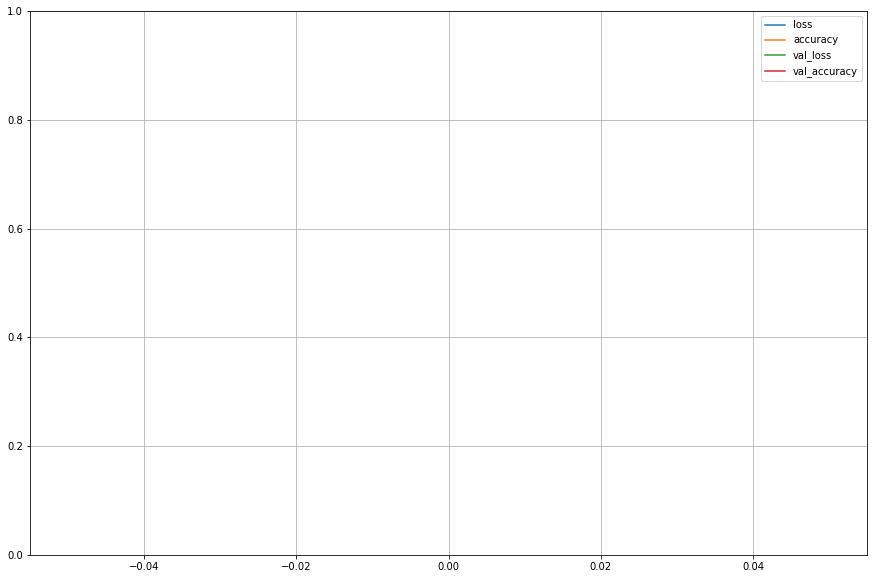

In [50]:
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 78.7639 - accuracy: 0.7775


[78.76390838623047, 0.7774999737739563]

In [52]:
X_new = X_test[:3]
y_new = y_test[:3]

In [53]:
model.predict(X_new)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
np.array(class_names)[np.argmax(model.predict(X_new), axis=1)]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

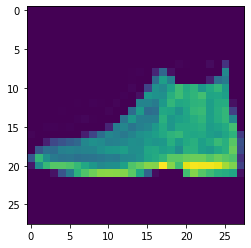

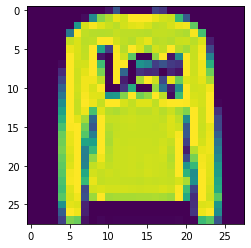

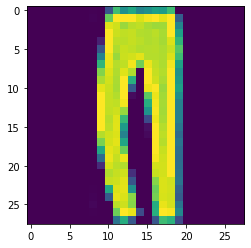

In [55]:
for i in X_new:
    plt.imshow(i)
    plt.show()

In [56]:
import os
import time

In [57]:
root_logdir = os.path.join(os.curdir, 'my_logs')
root_logdir

'.\\my_logs'

In [58]:
def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [59]:
run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_12_02-11_40_00'

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), 
                   callbacks=[tensorboard_cb])

Epoch 1/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4912 - accuracy: 0.8280 - val_loss: 0.4635 - val_accuracy: 0.8382
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4443 - accuracy: 0.8444 - val_loss: 0.4175 - val_accuracy: 0.8522
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4169 - accuracy: 0.8535 - val_loss: 0.3960 - val_accuracy: 0.8672
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3965 - accuracy: 0.8615 - val_loss: 0.3905 - val_accuracy: 0.8654
Epoch 5/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3816 - accuracy: 0.8653 - val_loss: 0.3881 - val_accuracy: 0.8708


In [61]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scaler', np.sin(step / 10), step = step)
        
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram('my_hist', data, buckets = 50, step = step)
        
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images * step / 1000, step=step)
        
        texts = ['The step is ' + str(step), 'Its square is ' + str(step ** 2)]
        tf.summary.text('my_text', texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)